# AI/Cyber Foundry Workshop on Practical Data Manipulation and Exploration with Python (28-May-2021)

## Preamble: Required Modules, Configuration, ...

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_context("notebook")
sns.set({ "figure.figsize": (11,7) })
%config InlineBackend.figure_format = 'retina' 

## A First Quick Pass with GapMinder as Case Study

could add here the text and code from my slides at `content/week-1/7z1018-2021-w1-google_colab_demo-gapminder_example.md`

## Data Understanding, Subsetting, and Sorting with the GapMinder Dataset

* We will make use of the simplified [`gapminder` dataset](https://github.com/jennybc/gapminder/blob/master/inst/extdata/gapminder.tsv)), which concerns records of population, life expectancy, and GDP of countries spanning some 50 years. You might want to have a look at the dataset rendered at the GitHub link and browse its structure and content for a quick understanding of the data.

* It is a tab-separated value (`.tsv`) text file. One is able to see it raw [here](https://github.com/jennybc/gapminder/blob/master/inst/extdata/gapminder.tsv?raw=True).

* For more on `gapminder`, you might want to check some of [Hans Rosling's TED talks](https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo) or the book [Factfulness: Ten Reasons We're Wrong About the World--and Why Things Are Better Than You Think](https://g.co/kgs/bEBSWN).


* This section's main takeaways are:

    - Using `pandas` for data understanding, subsetting, and sorting.

    - Gaining some familiarity with the fundamentals of DataFrames and the essential Python needed.

    - Making use of the `gapminder` dataset introduced as case study.

    - Importing and loading data (e.g., via `.read_csv()`).

    - **Dataframes** as tabular structures with **rows** and **columns**.

    - Rows and columns are associated with **indices**; indices contain **labels**. One can think of each label being a name to a column (i.e., a header) or to a row (i.e., a row number).

    - Subsetting with `[]` and `.loc[]`.

    - Obtaining quick data summaries with `.describe()`, `.unique()`, and `.value_counts()`.

    - Sorting rows, and selecting top/bottom rows.


* Selected sections of the Python Data Science Handbook that could be useful as support material are:
    * Introducing Pandas Objects
    * Data Indexing and Selection
    * Operations On Data In Pandas  


### Loading, and Quick Inspection of the Data

Right - let us have a quick look at the dataset. Typically, some data inspection is performed at early stages of a data science project or pipeline.

Firstly, we use `pandas` to read the file and instantiate a **DataFrame** object that we will use to manipulate the dataset.

In [2]:
dataset_location = 'https://github.com/jennybc/gapminder/blob/master/inst/extdata/gapminder.tsv?raw=True'

gm_df = pd.read_csv(
    dataset_location,
    sep='\t'
)

What follows are some variations on getting familiar with the data with some simple inspection that relies on DataFrame **methods**.

In [3]:
gm_df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
gm_df.sample()

In [ ]:
gm_df.sample(5)

In [ ]:
gm_df.tail(12)

In [ ]:
gm_df

**checkpoint**: say we would like to inspect the first 20 rows, and sample at least 10 observations from the dataset. Please write the corresponding code.

In [ ]:
gm_df.head(20)
gm_df.sample(10)

In [ ]:
# this is an example of a pipeline - the output of .head() becomes the input
# of .sample()
gm_df.head(20).sample(10)

### Subsetting DataFrames by Specifying Row and Column Labels

**Dataframes** are **objects** that can be seen as tabular structures with **rows** and **columns**. Rows and columns are associated with **indices**, and indices contain **labels**. One can think of each label being a name of a column (i.e., a header) or of a row (i.e., a row number). 

Accessing individual rows and columns is achieved via the operator `[]` or the method `.loc[]`.

In many scenarios, the application of a method such as `.head()` or `.loc[]` on a DataFrame returns a new DataFrame object (or view of an object, but let us not worry about this right now).

In [ ]:
gm_df.head()

In [ ]:
gm_df['year'].head()

In [ ]:
gm_df.head()['year']

In [ ]:
gm_df.loc[0]

In [ ]:
gm_df.loc[0, 'lifeExp']

In [ ]:
gm_df.loc[0]['lifeExp']

Instead of using a single row or column label, one can provide **a list** of labels.

In [ ]:
gm_df.loc[ [0,12,24] ]

In [ ]:
gm_df[ ['country', 'year', 'lifeExp'] ]

In [ ]:
gm_df.loc[ [0,12,24], ['country', 'year', 'lifeExp'] ]

In [ ]:
gm_df.loc[    [  0  ]    ]

In [ ]:
gm_df.loc[0]

The two cells above are not quite equivalent - we shouldn't worry too much about the distinction at this stage. But we should say that one returns a two-dimensional DataFrame and the other a **uni-dimensional DataFrame** (referred to as a `pandas` **Series**), if you'd like.

**checkpoint**: it is a good idea to practice some of the above. You could write code cells that do the following:

* produce a DataFrame with only the columns `year` and `pop`. For conciseness, you can simply take the `.head()` of the result.
* obtain a DataFrame with the rows with labels `10`, `20`, `100`, and `1000` - for no particular reason, rather than just trying out subsetting expressions.
* finally, a DataFrame for the subset of columns and rows expressed above.

In [ ]:
columns_I_am_interested = [ 'year', 'pop' ]
gm_df[ columns_I_am_interested ]

In [ ]:
gm_df.loc[ [10,20,100,1000], ['year','pop'] ]

By the way, one could also use **ranges of labels**, rather than listing every single one were are interesting in:

In [ ]:
gm_df.loc[0:5]

In [ ]:
gm_df.loc[0:5, 'lifeExp':'gdpPercap']

One can omit the beginning and/or the end of the range:

In [ ]:
gm_df.loc[1700:]

In [ ]:
gm_df.loc[1700:, 'lifeExp':]

In [ ]:
gm_df.loc[:, 'lifeExp':]

**checkpoint**: perhaps you would like to play with code on ranges above and try some alternatives?

In [ ]:
a_list_of_values = [ 10, 20, 30, 40, 50]
a_list_of_values[0:2]

In [ ]:
gm_df.loc[0:2]

### Subsetting DataFrames with Logical Conditions

If I am interested in only those latest observations dated of 2007...

One of the options is to use the method `.query()` - it can be more intuitive than our second option, but more limited, perhaps.

In [ ]:
gm_df.query("year==2007").head(1)

Quite commonly, Python data scientists will use **boolean masks** (in other words, vectors of True/False values). I am only using `.head()` to supress the output of too many rows - this is typical strategy in inspecting data and expressions.

In [ ]:
gm_df.loc[ gm_df['year']==2007 ]

In [ ]:
gm_df['year']==2007

How about which countries have had life expectancy equals to or greater than 80 years?

In [ ]:
gm_df.loc[ gm_df['lifeExp']>=80 ]

OK, some countries appear more than once. Can I get a quick list of unique country names? Yes, I can. It is worth emphasising that can **chain** DataFrame-producing statements, creating pipelines. The output of one method becomes the input of another.

In [ ]:
gm_df.loc[ gm_df['lifeExp']>=80 ]['country'].drop_duplicates()

Confusing? You can split a single statement into several lines, by assigning intermediate results to variables.

In [4]:
# the subset of data for life expectancy equal to or greater than 80 years
gm_gte80_df = gm_df.loc[ gm_df['lifeExp']>=80 ]
gm_gte80_country_df = gm_gte80_df[ ['country'] ]
gm_gte80_country_df.drop_duplicates()

,country
70,Australia
251,Canada
539,France
669,"Hong Kong, China"
694,Iceland
767,Israel
778,Italy
801,Japan
1103,New Zealand
1151,Norway


**checkpoint**: could you write Code cells for retrieving the following subsets of data?

* all the observations in 1952.
* all those that have a GDP-per-capita greater than US$30K.
* are there any instances where life expectancy was lower than 30 years?

In [ ]:
gm_df.loc[ gm_df['year']==1952 ]

In [ ]:
gm_df.loc[ gm_df['gdpPercap']>30000 ]

In [ ]:
gm_df.loc[ gm_df['lifeExp'] < 30 ]

### DataFrame Shape

In [ ]:
gm_df.shape

In [ ]:
len(gm_df)

In [ ]:
gm_df.shape[0]

In [ ]:
gm_df.shape[1]

### Subsetting DataFrames: Multiple Conditions

Trust me - you will need the brackets to make sure that the evaluation order is correct.

In [ ]:
gm_df.loc[ (gm_df['year']==1952) & (gm_df['lifeExp']>70) ]

In [ ]:
gm_df.loc[ (gm_df['year']==2007) & (gm_df['lifeExp']>70) ]

Would you to like to know how many? `.shape` or `len` will help you here.

In [ ]:
the_subset_df = gm_df.loc[ (gm_df['year']==1952) & (gm_df['lifeExp']>70) ]
len(the_subset_df)

In [ ]:
the_subset_df = gm_df.loc[ (gm_df['year']==2007) & (gm_df['lifeExp']>70) ]
len(the_subset_df)

What is a suitable interpretation of these next two pieces of code?

In [ ]:
gm_df.loc[ (gm_df['lifeExp']>=78) & (gm_df['lifeExp']<=80) ].head()

In [ ]:
gm_df.loc[ (gm_df['lifeExp']<30) | (gm_df['lifeExp']>81) ]

### Sorting the Rows of a DataFrame

In [ ]:
# inline documentation on a method? Use the exclamation mark
gm_df.sort_values?

In [ ]:
gm_2007_df = gm_df.loc[ gm_df['year']==2007 ]
gm_2007_df.sort_values(by='pop', ascending=True)

In [ ]:
gm_2007_df.sort_values(by='pop', ascending=False).tail(10)

### Exercises

As a reminder, this is the DataFrame we are starting with:

In [ ]:
gm_df.head(1)

1. Select only the observations for the year of 1972.

In [ ]:
gm_df.loc[ gm_df['year']==1972 ]

2. For the resulting DataFrame of query above, how many data instances there are?

In [ ]:
# one way of doing it...
gm_df.loc[ gm_df['year']==1972 ].shape

In [ ]:
# or...
len(gm_df.loc[ gm_df['year']==1972 ])

3. Obtain the rows for Brazil only.

In [ ]:
gm_df.loc[ gm_df['country']=='Brazil' ]

4. What are the years for which observations have been recorded? (you might want to check what methods such as `.unique()` and `.value_counts()` can do for you here.

In [ ]:
gm_df

In [ ]:
gm_df['year'].drop_duplicates().shape

5. And how many different years?

In [ ]:
len(gm_df['year'].unique())

6. What are top-10 countries in 2007 with respect to life expectancy?

In [ ]:
gm_df.query("year==2007").sort_values(by='lifeExp', ascending=False).head(10)

7. Obtain the subset of observations for Asia in 2007.

In [ ]:
gm_df.loc[ (gm_df['year']==2007) & (gm_df['continent']=='Asia') ].head()

8. Produce the observations for South America for the period between 2000 and 2009.

In [ ]:
gm_df.loc[ (gm_df['continent']=='Americas') & (gm_df['year'].between(2000, 2009)) ]

In [ ]:
gm_df['continent'].unique()

9. Show life expectancy and GDP-per-capita for Brazil.

10. How many observations do we have for each continent?

In [ ]:
gm_df.loc[ gm_df['year']==2007, 'continent'].value_counts()

11. What is the life expectancy for Brazil measured in 2007?

## Data Pre-Processing with the PIMA Case Study

### Inspecting, Obtaining Quick Summaries, Visualising Distributions

The [PIMA Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) was compiled by is the National Institute of Diabetes and Digestive and Kidney Diseases (US); the goal was to predict whether or not a patient had diabetes, based on certain diagnostic measurements (e.g., glucose level, diastolic blood pressure). It can be downloaded from [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database#diabetes.csv).

The [documentation](https://archive.ics.uci.edu/ml/datasets/diabetes) says

> ...for Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration at 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [5]:
pima_df = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/ai-cyber-foundry-data-mnpl-expl-workshop/main/data/diabetes.csv'
)

Firstly, we will have a glimpse at the data, making a quick inspection of its structure and content.

In [6]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now, we shall see summary of the features and their data types - roughly, the distinction is between numbers (discrete and continuous) and strings; also, provides an idea of number of observations and the number of missing values for each feature.

In [ ]:
pima_df.info()

In this case, no missing values seem to have been recorded (we will see later that this might not be the case). The low-level `numpy` data types here usually tell us that `int64` are whole numbers (integers), `float64` are continuous values (floats), and `object` are strings.

If you'd like, you can always check the names (and the order) of the columns:

In [ ]:
pima_df.columns

The returned value is a `pandas` `Index`; recall that a DataFrame is 2D structure composed of rows and columns; columns are defined by an __index__; a column name is an index __label__.

You can also check what the row index looks like. In this case, it is not very interesting: a sequence of integers has been created automatically to represent each row uniquely.

In [ ]:
pima_df.index

Obtain a table of crucial summaries of a univariate data distribution; the usual *5-number summary* (min, max, 1st quartile, 3rd quartile, median), and mean and stardard deviation. Let us use `Age` as an example.

In [ ]:
pima_df['Pregnancies'].describe()

It is normally useful to, in addition, inspect data distributions with plots. For quantitative data, a histogram is one of the first go-to structures. Let us do it for `Pregnancies`.

In [ ]:
pima_df['Pregnancies'].plot.hist();

The semicolon at the end is simply to supress some unncessary text-based output.

The bins are arbitrary; different binning might results in slightly different shapes. For that reason, a kernel-density estimate (KDE) is commonly preferred or simply used in addition. We will look at the KDE for `Pregnancies`, firstly, using the DataFrame's plot capabilities (recall that `pandas` provides a wrapper on `matplolib`'s functionality to make our lifes easier).

In [ ]:
pima_df['Pregnancies'].plot.hist(bins=18);

In [ ]:
pima_df['Pregnancies'].plot.kde();

One can combine histograms and KDEs, for example, with `seaborn`'s `.distplot()`. Let us do it for diastolic blood pressure.

In [ ]:
# I would like to update this to my latest style (see notebooks on HCXAI work)
sns.distplot(pima_df['BloodPressure']);

What are all those zero (or close to zero) observations?

A box-plot is quite useful for visualising the five-number summary as well as identify any __outliers__. The latter can just be unusual or extreme values, or noisy, missing, or erroneous data.

In [ ]:
sns.boxplot(pima_df['BloodPressure']);

In [ ]:
pima_df.loc[ pima_df['BloodPressure']==0 ].sample(5)

In [ ]:
pima_df.loc[ pima_df['BloodPressure'].between(20,35) ].head()

In [ ]:
sns.distplot(pima_df.loc[ pima_df['BloodPressure']!=0 ]['BloodPressure']);

For categorical variables - in our case study, there seems to be only `outcome`, the statistical summaries and the options for data distribution plots change. For example:

In [ ]:
pima_df['Outcome'].value_counts()

In [ ]:
pima_df['Outcome'].value_counts().plot.bar();

As shown, it is useful to see it as a bar chart). We can use the DataFrame plotting functionality for that, and also customise the `matplotlib` `axis` object (for example, by setting `x` and `y` labels).

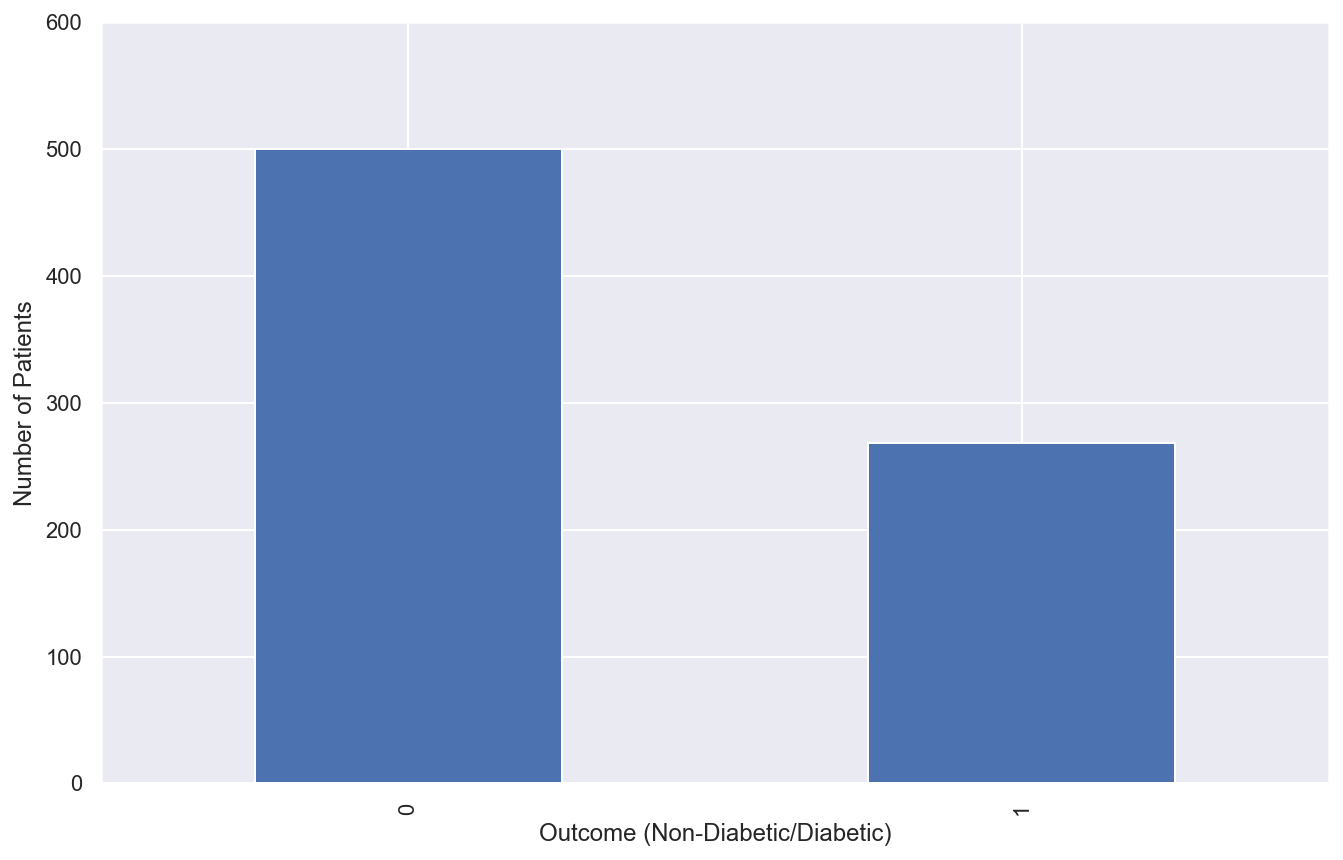

In [7]:
ax = pima_df['Outcome'].value_counts(sort=False).plot.bar()
ax.set_xlabel('Outcome (Non-Diabetic/Diabetic)')
ax.set_ylabel('Number of Patients')
ax.set_ylim(0,600);

Help with a method? Documentation in the notebook?

In [ ]:
sns.barplot?

Again, we can `seaborn`'s alternatives for plotting the frequency distribution.

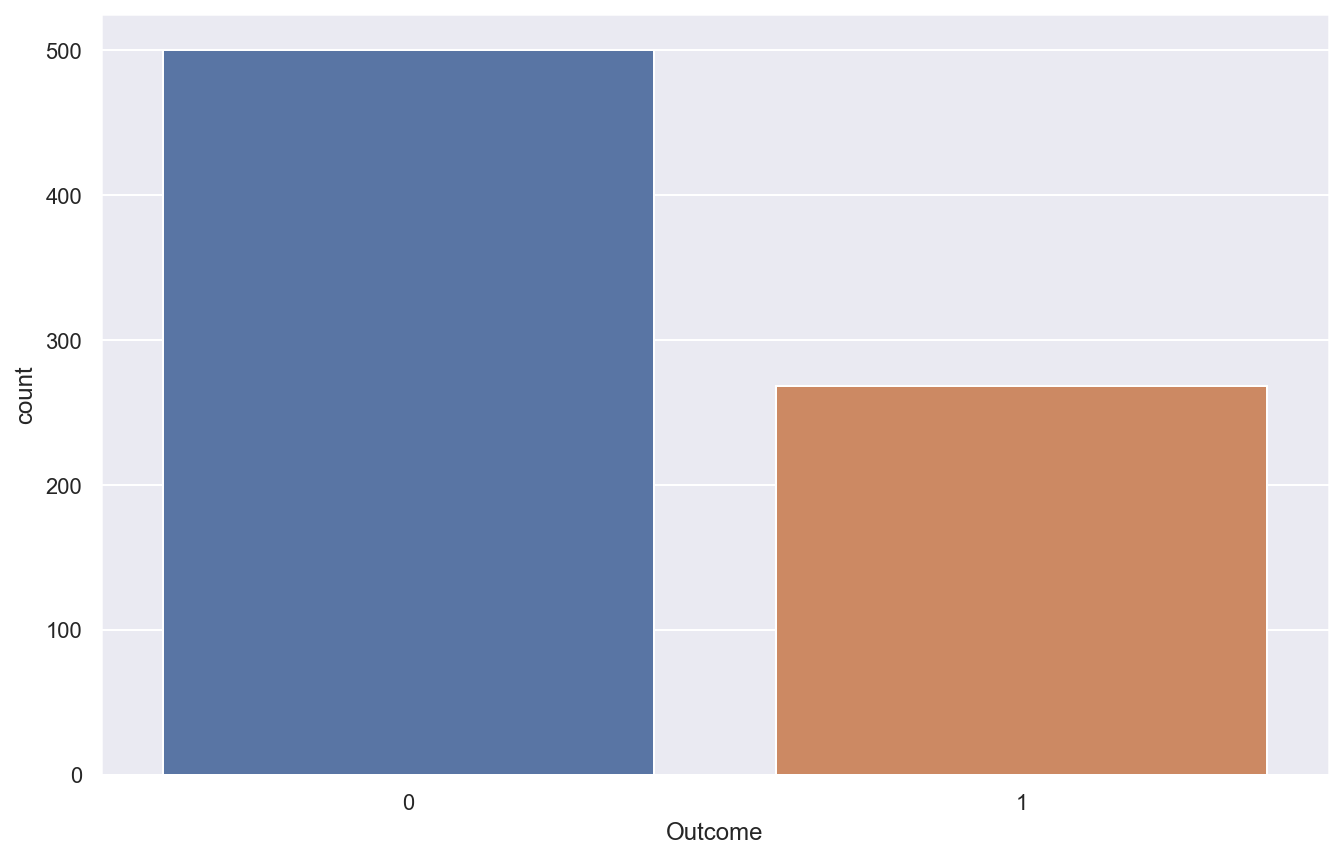

In [9]:
sns.countplot(x=pima_df['Outcome']);

Note that as `outcome` is expressed as numbers, `pandas` would have infered its data type as `int64` or something similar, despite `outcome` being, in reality, a categorical feature. Some methods such as `.describe()` would rely on this assumption:

In [ ]:
pima_df['Outcome'].describe()

It makes sense to tell `pandas` that `Outcome` is categorical: one approach is to convert it to the data type `category` as follows:

In [ ]:
pima_df['Outcome'] = pima_df['Outcome'].astype('category')

In [ ]:
pima_df['Outcome'].describe()

In [ ]:
pima_df['Outcome'].value_counts()

**checkpoint**: it is probably a good idea now for you to review the above and replicate the analysis on other features of the dataset. What can you learn from the data distribution and, in some cases, outliers?

### Missing Values, Distributions in Groups

How many missing values do we actually have for `BloodPressure`?

In [ ]:
len(pima_df.loc[ pima_df['BloodPressure']==0 ])

And for both `BMI` and `SkinThickness`?

In [ ]:
len(pima_df.loc[ (pima_df['BMI']==0) & (pima_df['SkinThickness']==0) ])

Let us have quick look at a random sample of the above:

In [ ]:
no_BMI_SkinThickness_df = pima_df.loc[ (pima_df['BMI']==0) & (pima_df['SkinThickness']==0) ]

In [ ]:
no_BMI_SkinThickness_df.sample(5)

What is the distribution of `Outcome` over those with 3 or more pregnancies, and how does it compare to those below?

In [ ]:
sns.countplot(x=pima_df.loc[ pima_df['Pregnancies']>=3 ]['Outcome']);

In [ ]:
sns.countplot(x=pima_df.loc[ pima_df['Pregnancies']<3 ]['Outcome']);

We could also have a look at the top and the bottom 10% of BMI.

In [ ]:
# the median
pima_df['Pregnancies'].quantile(.5)

In [ ]:
bmi_90_percentile = pima_df['BMI'].quantile(0.90)
bmi_90_percentile

In [ ]:
bmi_10_percentile = pima_df['BMI'].quantile(0.10)
bmi_10_percentile

In [ ]:
sns.countplot(pima_df.loc[ pima_df['BMI']>=bmi_90_percentile, 'Outcome']);

In [ ]:
sns.countplot(pima_df.loc[ pima_df['BMI']>=bmi_10_percentile, 'Outcome']);

**checkpoint**:

* for those above average in terms of BMI and skin thickness, what are the numbers of diabetics and non-diabetics? How does that compare to the whole dataset?

* Take a sample of those with BMI and skin thickness above average.

* for those with diabetes, what do the data distributions for number of pregnancies and diastolic blood pressure look like? How do they compare with those without diabetes?


## Data Understanding and Exploration Challenge on the Titanic Dataset

*add brief description from notebook; adapt PDF and link to it; need to upload to the GitHub repo a copy of the dataset*

## Reshaping Data

We will make use of the familiar `gapminder` for some of examples and exercises.

In [ ]:
dataset_location = 'https://github.com/jennybc/gapminder/blob/master/inst/extdata/gapminder.tsv?raw=True'
gm_df = pd.read_csv(
    dataset_location,
    sep='\t'
)

A quick reminder of structure and contents of the dataset:

In [ ]:
gm_df.sample()

In [ ]:
gm_df.head()

### Changing Row Indices

We have discussed in more than one occasion that DataFrames are indexed by **row** and **column** indices. By default, `pandas` created a range of integers for the **row labels**:

In [ ]:
gm_df.index

And the **column labels** match the header of the `.csv` file:

In [ ]:
gm_df.columns

To address one or more rows, one would normally use `.loc` with the corresponding labels:

In [ ]:
gm_df.loc[249]

In many scenarios, one might want to make a row index more meaningful, into something that corresponds to intrinsic properties of the data. For example, if you we were looking a student dataset, we could use student IDs or (albeit, not as good) full names. More often than not, row labels are useful when they stand as unique identifiers for observations.

We can use `.set_index()` and `.reset_index()` for turning a column into a row index, and vice-versa. Let us illustrate with a subset of `gapminder`.

In [ ]:
australia_df = gm_df.loc[ gm_df['country']=='Australia' ]

In [ ]:
australia_df

I will take a subset of columns for making the demonstration easier. Instead of `.loc` for selecting the columns of interest, I am **droping** those I do not wish to keep.

In [ ]:
australia_df = australia_df.drop(
    # columns=['country','continent', 'gdpPercap', 'pop']
    columns=['country','continent']
)

In [ ]:
australia_df

In [ ]:
australia_df = australia_df.set_index('year')

In [ ]:
australia_df

In [ ]:
australia_df.index

In [ ]:
australia_df.loc[[2002]]

In [ ]:
australia_df.loc[1992:2007]

**checkpoint**:

Take a subset of `gapminder` for `Americas` and `1952`; it makes sense to assign it to a variable (with a meaningful name). Then, make `country` the row index, and try some indexing expressions with `.loc` for selecting unique observations from that subset.

In [ ]:
americas_df = gm_df.loc[ 
    (gm_df['continent']=='Americas') & (gm_df['year']==1952)
]

In [ ]:
americas_df.head()

In [ ]:
americas_df = americas_df.set_index('country')

In [ ]:
americas_df.head()

In [ ]:
americas_df.loc['Brazil']

In [ ]:
americas_df.head(3)

In [ ]:
americas_df.reset_index('country').head(3)

### Hierarchical Indices: A Very Brief Look

More than one column can be pushed into the row index; then, the latter becomes a **hierarchical index**. Each column occupies an index **level**. There are all sorts of complex operations and transformation that we can apply on and with them; for now, we are only looking at reshaping operations such as `set_index` and `reset_index`. 

Further information can be found in the the [`pandas` online documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-indexing-with-hierarchical-index), as well as in the **Python Data Science Handbook**.

For illustration, we will take again a subset of `gapminder` - this time, only for countries in `Oceania`.

In [10]:
oceania_df = gm_df.loc[ gm_df['continent']=='Oceania' ]
oceania_df = oceania_df.drop(
    columns=['continent', 'gdpPercap', 'pop']
)
oceania_df.sample(5)

,country,year,lifeExp
1101,New Zealand,1997,77.55
68,Australia,1992,77.56
1100,New Zealand,1992,76.33
1102,New Zealand,2002,79.11
67,Australia,1987,76.32


Wouldn't it be more convenient to address a specific row given a country name and year?

In [11]:
oceania_df = oceania_df.set_index(['country', 'year'])
oceania_df

lifeExp
country     year         
Australia   1952   69.120
            1957   70.330
            1962   70.930
            1967   71.100
            1972   71.930
            1977   73.490
            1982   74.740
            1987   76.320
            1992   77.560
            1997   78.830
            2002   80.370
            2007   81.235
New Zealand 1952   69.390
            1957   70.260
            1962   71.240
            1967   71.520
            1972   71.890
            1977   72.220
            1982   73.840
            1987   74.320
            1992   76.330
            1997   77.550
            2002   79.110
            2007   80.204

In [12]:
oceania_df.loc['Australia']

,lifeExp
year,
1952,69.120
1957,70.330
1962,70.930
1967,71.100
1972,71.930
1977,73.490
1982,74.740
1987,76.320
1992,77.560


In [13]:
oceania_df.loc[('Australia', 2007)]

lifeExp    81.235
Name: (Australia, 2007), dtype: float64

**checkpoint**:

In a similar fashion, obtain a subset for 2007 observations and use both `continent` and `country` as row index. Try a few `.loc` expressions using pairs of continent and country labels, as well as partial matching on a single `continent`.

In [14]:
year_df = gm_df.query("year==2007").set_index(['continent', 'country'])

In [15]:
year_df.head()

year  lifeExp       pop     gdpPercap
continent country                                           
Asia      Afghanistan  2007   43.828  31889923    974.580338
Europe    Albania      2007   76.423   3600523   5937.029526
Africa    Algeria      2007   72.301  33333216   6223.367465
          Angola       2007   42.731  12420476   4797.231267
Americas  Argentina    2007   75.320  40301927  12779.379640

In [16]:
year_df.loc['Oceania']

,year,lifeExp,pop,gdpPercap
country,,,,
Australia,2007,81.235,20434176,34435.36744
New Zealand,2007,80.204,4115771,25185.00911


In [17]:
year_df.loc[('Oceania', 'New Zealand')]

year         2.007000e+03
lifeExp      8.020400e+01
pop          4.115771e+06
gdpPercap    2.518501e+04
Name: (Oceania, New Zealand), dtype: float64

### Long and Wide Data Formats

In short: typically, the columns of the dataset represent properties of the data but, in a number of situations (say, because of the way the data was recorded, or for making comparisons and plotting easier), values are shown are columns.

In [18]:
oceania_df.head()

lifeExp
country   year         
Australia 1952    69.12
          1957    70.33
          1962    70.93
          1967    71.10
          1972    71.93

I just want to produce a small dataset with values as column label. `.unstack()` transforms **a set of row labels into a set of columns labels** (the opposite is `.stack()`; further examples on the Python Data Science Handbook).

In [19]:
oceania_wide_df = oceania_df.unstack('year')['lifeExp']
oceania_wide_df

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,69.12,70.33,70.93,71.10,71.93,73.49,74.74,76.32,77.56,78.83,80.37,81.235
New Zealand,69.39,70.26,71.24,71.52,71.89,72.22,73.84,74.32,76.33,77.55,79.11,80.204


In [20]:
oceania_wide_df.index

Index(['Australia', 'New Zealand'], dtype='object', name='country')

In [21]:
oceania_wide_df.columns

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64', name='year')

The following takes the `.mean()` across rows - a mean life expectancy value for each year (the columns).

In [22]:
oceania_wide_df.mean()

year
1952    69.2550
1957    70.2950
1962    71.0850
1967    71.3100
1972    71.9100
1977    72.8550
1982    74.2900
1987    75.3200
1992    76.9450
1997    78.1900
2002    79.7400
2007    80.7195
dtype: float64

Recapping:

* `.set_index()` converts a column into a row index, and vice-versa. The values of a column are mapped into row labels. Its reverse is  `reset_index()`.

* `.unstack()` converts a row index into a set of columns. `.stack()` is its reverse.

Usefully, one can swaps rows with columns via a **transpose** operation:

In [23]:
oceania_wide_df

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,69.12,70.33,70.93,71.10,71.93,73.49,74.74,76.32,77.56,78.83,80.37,81.235
New Zealand,69.39,70.26,71.24,71.52,71.89,72.22,73.84,74.32,76.33,77.55,79.11,80.204


In [24]:
oceania_wide_df.T

country,Australia,New Zealand
year,,
1952,69.120,69.390
1957,70.330,70.260
1962,70.930,71.240
1967,71.100,71.520
1972,71.930,71.890
1977,73.490,72.220
1982,74.740,73.840
1987,76.320,74.320
1992,77.560,76.330


In [25]:
oceania_wide_df.T.index

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64', name='year')

In [26]:
oceania_wide_df.T.columns

Index(['Australia', 'New Zealand'], dtype='object', name='country')

## Computations Across Columns and Rows

Let us focus on that `oceania_wide_df` from the previous section: it concerns a subset of the GapMinder data for the countries in `Oceania`, reshaped so as each year is a different column of the DataFrame.

In [27]:
oceania_df = gm_df.loc[ gm_df['continent']=='Oceania' ]
oceania_df = oceania_df.drop(
    columns=['continent', 'gdpPercap', 'pop']
)
oceania_df = oceania_df.set_index(['country', 'year'])
oceania_df

lifeExp
country     year         
Australia   1952   69.120
            1957   70.330
            1962   70.930
            1967   71.100
            1972   71.930
            1977   73.490
            1982   74.740
            1987   76.320
            1992   77.560
            1997   78.830
            2002   80.370
            2007   81.235
New Zealand 1952   69.390
            1957   70.260
            1962   71.240
            1967   71.520
            1972   71.890
            1977   72.220
            1982   73.840
            1987   74.320
            1992   76.330
            1997   77.550
            2002   79.110
            2007   80.204

In [28]:
oceania_wide_df = oceania_df.unstack('year')['lifeExp']
oceania_wide_df

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,69.12,70.33,70.93,71.10,71.93,73.49,74.74,76.32,77.56,78.83,80.37,81.235
New Zealand,69.39,70.26,71.24,71.52,71.89,72.22,73.84,74.32,76.33,77.55,79.11,80.204


**Aggregation functions** that we have applied on single columns before work on **subsets of DataFrames** too. We can specify whether they should work across columns or rows.

In [29]:
oceania_wide_df.mean(axis='columns')

country
Australia      74.662917
New Zealand    73.989500
dtype: float64

In [30]:
oceania_wide_df.mean(axis='rows')

year
1952    69.2550
1957    70.2950
1962    71.0850
1967    71.3100
1972    71.9100
1977    72.8550
1982    74.2900
1987    75.3200
1992    76.9450
1997    78.1900
2002    79.7400
2007    80.7195
dtype: float64

In [31]:
oceania_wide_df.max(axis='columns')

country
Australia      81.235
New Zealand    80.204
dtype: float64

In [32]:
oceania_wide_df.max()

year
1952    69.390
1957    70.330
1962    71.240
1967    71.520
1972    71.930
1977    73.490
1982    74.740
1987    76.320
1992    77.560
1997    78.830
2002    80.370
2007    81.235
dtype: float64

In [33]:
oceania_wide_df.std()

year
1952    0.190919
1957    0.049497
1962    0.219203
1967    0.296985
1972    0.028284
1977    0.898026
1982    0.636396
1987    1.414214
1992    0.869741
1997    0.905097
2002    0.890955
2007    0.729027
dtype: float64

In [34]:
oceania_wide_df.std(axis='columns')

country
Australia      4.147774
New Zealand    3.559724
dtype: float64

In [35]:
oceania_wide_df.median(axis='columns')

country
Australia      74.115
New Zealand    73.030
dtype: float64

In [36]:
oceania_wide_df.quantile(0.5, axis='columns')

country
Australia      74.115
New Zealand    73.030
Name: 0.5, dtype: float64

In [37]:
oceania_wide_df.quantile(0.25, axis='columns')

country
Australia      71.0575
New Zealand    71.4500
Name: 0.25, dtype: float64

In [38]:
oceania_wide_df.quantile(0.75, axis='columns')

country
Australia      77.8775
New Zealand    76.6350
Name: 0.75, dtype: float64

I wanted the IQR - third quartile - first quartile

In [39]:
(oceania_wide_df.quantile(0.75, axis='columns') - 
oceania_wide_df.quantile(0.25, axis='columns'))

country
Australia      6.820
New Zealand    5.185
dtype: float64

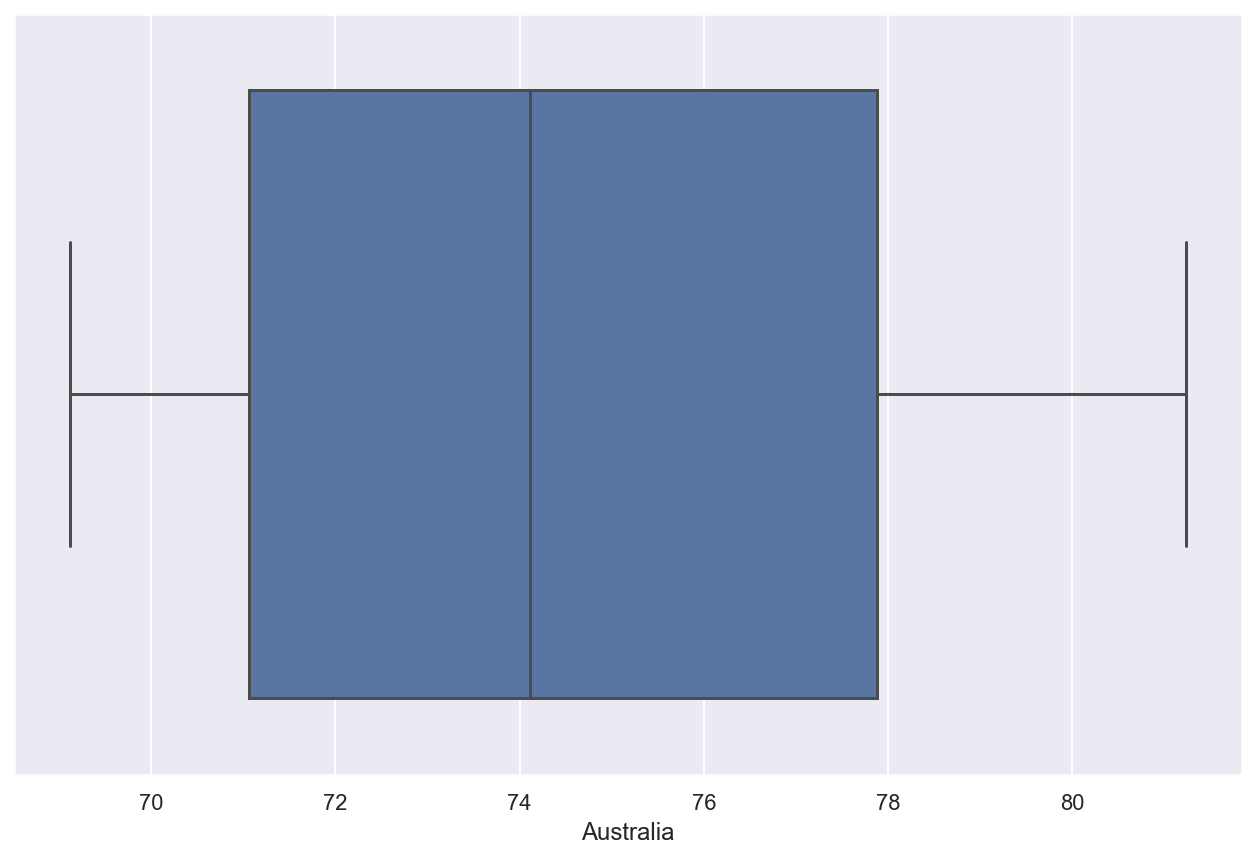

In [40]:
sns.boxplot(x=oceania_wide_df.loc['Australia']);

## Feature Engineering and Vectorisation

### Derived Features and Index Aligment

For a particular year, we could obtain the total population of the countries listed in `gapminder` (as I am planning to make changes to that slice of the data, I am going to take a __copy__ of it).

In [ ]:
gm_2007_df = (gm_df.loc[ gm_df['year']==2007 ]).copy()

In [ ]:
total_pop = gm_2007_df['pop'].sum()
total_pop

With __vectorisation__, one can produce a derived feature, involving the column `pop`, to obtain **the percentage** of the **total population** for **each country**:

In [ ]:
(gm_2007_df['pop'] / total_pop * 100).head()

Thanks to __index alignment__, we can add this derived feature to our DataFrame by, for example, **assigning it** to a **non-existing column label** in the DataFrame:

In [ ]:
gm_2007_df.loc[:, 'pop_perc'] = gm_2007_df['pop'] / total_pop * 100

In [ ]:
gm_2007_df.sort_values('pop_perc').tail()

In [ ]:
sns.distplot(gm_2007_df['pop_perc']);

I feel that I would rather see population in millions - again, we can produce a derived feature from a simple arithmetic expression and, this time, assign that to an existing column:

In [ ]:
gm_2007_df['pop'] = gm_2007_df['pop'] / 1000000

In [ ]:
gm_2007_df.sort_values('pop_perc').tail()

**checkpoint**: Can we reverse-engineer the countries' GDPs?

In [ ]:
gm_2007_df['pop'] = gm_2007_df['pop'] * 1000000

In [ ]:
gm_2007_df.sort_values('pop').tail()

In [ ]:
gm_2007_df['gdp'] = gm_2007_df['gdpPercap'] * gm_2007_df['pop'] / 1000000000

In [ ]:
gm_2007_df.sort_values('pop').tail()

More on index alignment and vectorised operations can be found [in this section]() in our main textbook.

Comparing values of subsets works well when they **share** the same **index**:

In [ ]:
china_df = gm_df.loc[ gm_df['country']=='China' ].set_index('year')

In [ ]:
china_df.head(3)

In [ ]:
afg_df = gm_df.loc[ gm_df['country']=='Afghanistan' ].set_index('year')

In [ ]:
afg_df.head(3)

In [ ]:
china_df['lifeExp'] - afg_df['lifeExp']

This gives us a nice opportunity to illustrate the use of `concat` for aligning slices (that share an index) into a new DataFrame. Notice also the use of `.columns` for renaming.

In [ ]:
df = pd.concat([ 
    china_df['lifeExp'], afg_df['lifeExp'], china_df['lifeExp'] - afg_df['lifeExp']
], axis='columns')
df

In [ ]:
df.columns = [ 'China_lifeExp', 'Afghanistan_lifeExp', 'lifeExp_diff']
df

**checkpoint**: using `states_df` below, obtain:

* population density (assuming area is given in square Km, we are looking for number of people per Km<sup>2</sup>). Add it to the DataFrame as a new feature.

* by how much a state's area is greater or smaller than the mean area.

* the state populations in millions.

This is a tiny dataset on US states (used in the Python Data Science Handbook) that is useful for illustration:

In [ ]:
states_df = pd.DataFrame(
    {
        'area': {'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995},
        'pop': {'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135}
    }
)

Notice, here, that we instantiate a DataFrame from a Python data structure - in this case, a dictionary, where each key (a column label) points to a dictionary associating US state names to area and population. Normally, we would creating DataFrames from data residing in data files or databases, but this approach can be useful for testing/debugging/learning purposes.

More on dictionaries? You could take a look at [this section](https://jakevdp.github.io/WhirlwindTourOfPython/06-built-in-data-structures.html#Dictionaries) of A Whirlwind Tour of Python.

In [ ]:
states_df

### Transformations to Feature Domains

#### Discretisation (with `pd.cut()`)

Back to the PIMA Diabetes dataset - one could think of working with BMI as **categorical** rather than a **continuous** data type. **Discretising** (i.e., changing from continuous to discrete categories) can be achived, for example, via the [`pd.cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) function as the example below shows.

The standard definition (e.g., from Wikipedia) of different BMI bands is:

* *Underweight*: < 18.5.
* *Normal weight*: between 18.5 and 25.
* *Overweight*: between 25 to 30.
* *Obese*: 30 or greater.

In [ ]:
pima_df = pd.read_csv('./data/pima-indians-diabetes/diabetes.csv')

In [ ]:
pima_df.loc[[1]]

In [ ]:
max_BMI = pima_df['BMI'].max()
pd.cut(
    pima_df['BMI'],
    bins=[0, 18.5, 25, 30, max_BMI + 0.001],
    right=False,
    include_lowest=True
).head(1)

Notice that `pandas` creates a `category` that is **ordinal** (`[low < normal < overweight < obese]`), and that the parameters `right` and `include_lowest` indicate whether the intervals are open or closed, and at which endpoint.

In [ ]:
pima_df['BMI_cat'] = pd.cut(
    pima_df['BMI'],
    bins=[0, 18.5, 25, 30, max_BMI + 0.001],
    labels=['low', 'normal', 'overweight', 'obese'],
    right=False,
    include_lowest=True
)

In [ ]:
pima_df.head()

In [ ]:
pima_df['BMI_cat'].value_counts()

#### Mapping domain into a different set of values (with `.map()`):

In [ ]:
pima_df['Outcome'].map({1: 'Diabetic', 0: 'Non-Diabetic'})

In [ ]:
pima_df['Outcome_cat'] = pima_df['Outcome'].map({1: 'Diabetic', 0: 'Non-Diabetic'})

In [ ]:
pima_df.head(5)

Another example of vectorised transformations - this time, on categories (which are strings). More on vectorised string operations [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html).

In [ ]:
pima_df['BMI_cat'] = pima_df['BMI_cat'].str.title()

#### Transformation of Scale (Into Orders of Magnitude)

In [ ]:
titanic_df = pd.read_csv('./data/titanic-kaggle/train.csv')

In [ ]:
titanic_df.sample()

In [ ]:
sns.distplot(titanic_df['Fare']);

In [ ]:
np.log(titanic_df.loc[ titanic_df['Fare']>0, 'Fare' ])

In [ ]:
# https://matplotlib.org/3.1.1/api/axes_api.html#ticks-and-tick-labels
ax = sns.distplot(np.log10(titanic_df.loc[ titanic_df['Fare']>0, 'Fare' ]))
ax.set_xticks(range(0,4))
ax.set_xticklabels(np.power(10, range(0,4)));

## Grouping and Aggregating Data


### Split, Apply, Combine

A quick example: let us obtain the mean averages of `lifeExp`, `pop`, and `gdpPercap` per country:

In [41]:
gm_df.groupby('country')[['lifeExp', 'gdpPercap']].mean().head()

,lifeExp,gdpPercap
country,,
Afghanistan,37.478833,802.674598
Albania,68.432917,3255.366633
Algeria,59.030167,4426.025973
Angola,37.883500,3607.100529
Argentina,69.060417,8955.553783


Illustration from the textbook: https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#Split,-apply,-combine.

How many observations for each continent?

In [ ]:
gm_df.groupby('continent').size()

In [ ]:
gm_df['continent'].value_counts()

The highest life expectancy by continent and year?

In [ ]:
gm_df.groupby(['continent', 'year'])[['lifeExp']].max()

`.unstack()` is normally quite useful in combination with grouping. We've seen it before - it turns row labels into column labels:

In [ ]:
gm_df.groupby(['continent', 'year'])[['lifeExp']].mean().head()

In [ ]:
gm_df.groupby(['continent', 'year'])['lifeExp'].mean().unstack('year')

A more complex expression (which could surely be broken down) shows how grouping and reshaping can give us some more interesting plots for groups comparisons and insights:

In [ ]:
gm_df.groupby(['continent', 'year'])['lifeExp'].mean().unstack('year').loc[:, 1992:2007].plot.bar();

Aside - **breaking down long statements/pipelines** (the brackets are needed so that Python doesn't complain, for example, about all the whitespace between method calls and their objects):

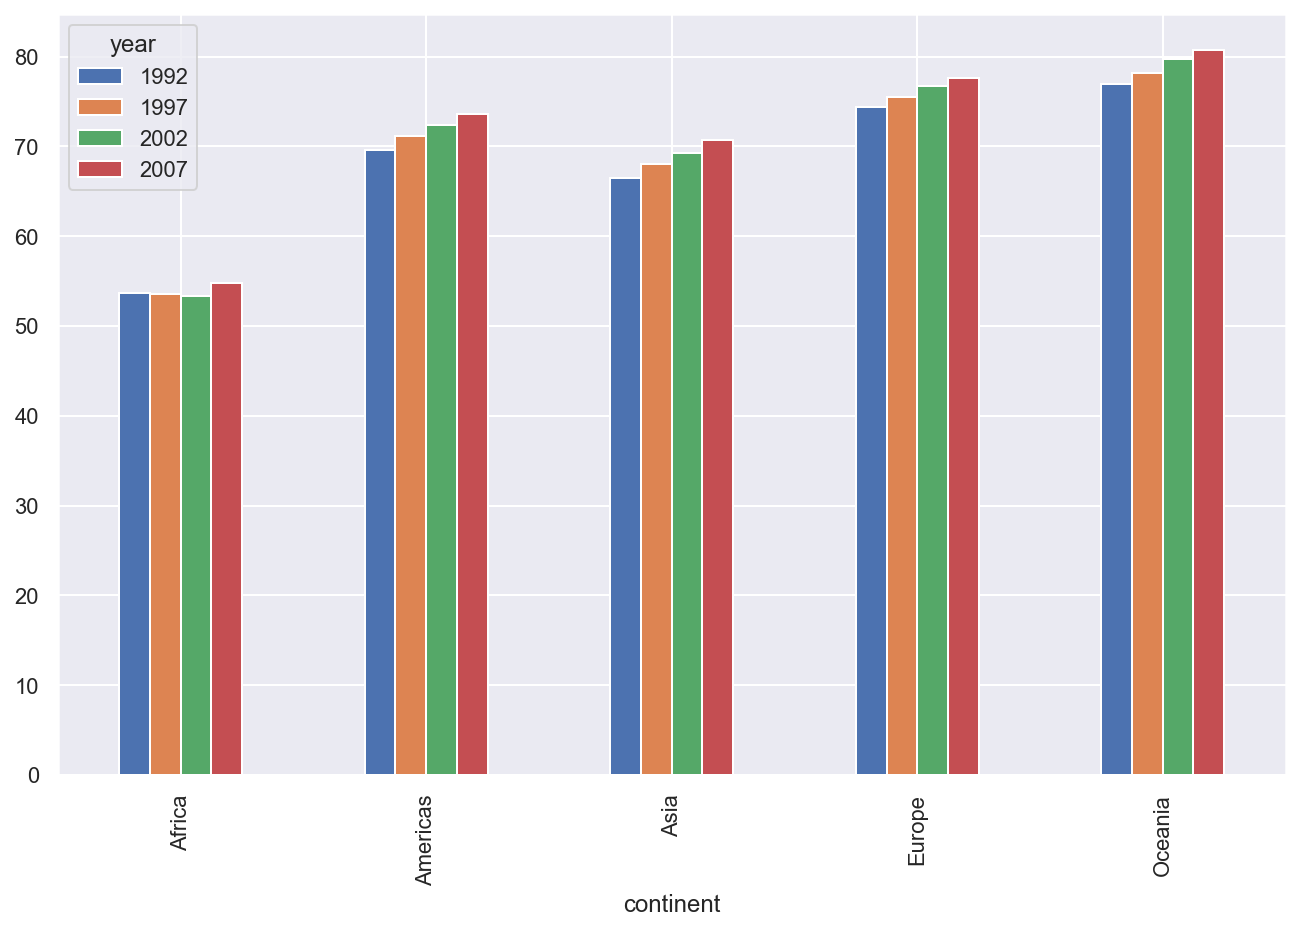

In [42]:
(gm_df
     .groupby(['continent', 'year'])
     ['lifeExp']
     .mean()
     .unstack('year')
     .loc[:, 1992:2007]
     .plot.bar()
);

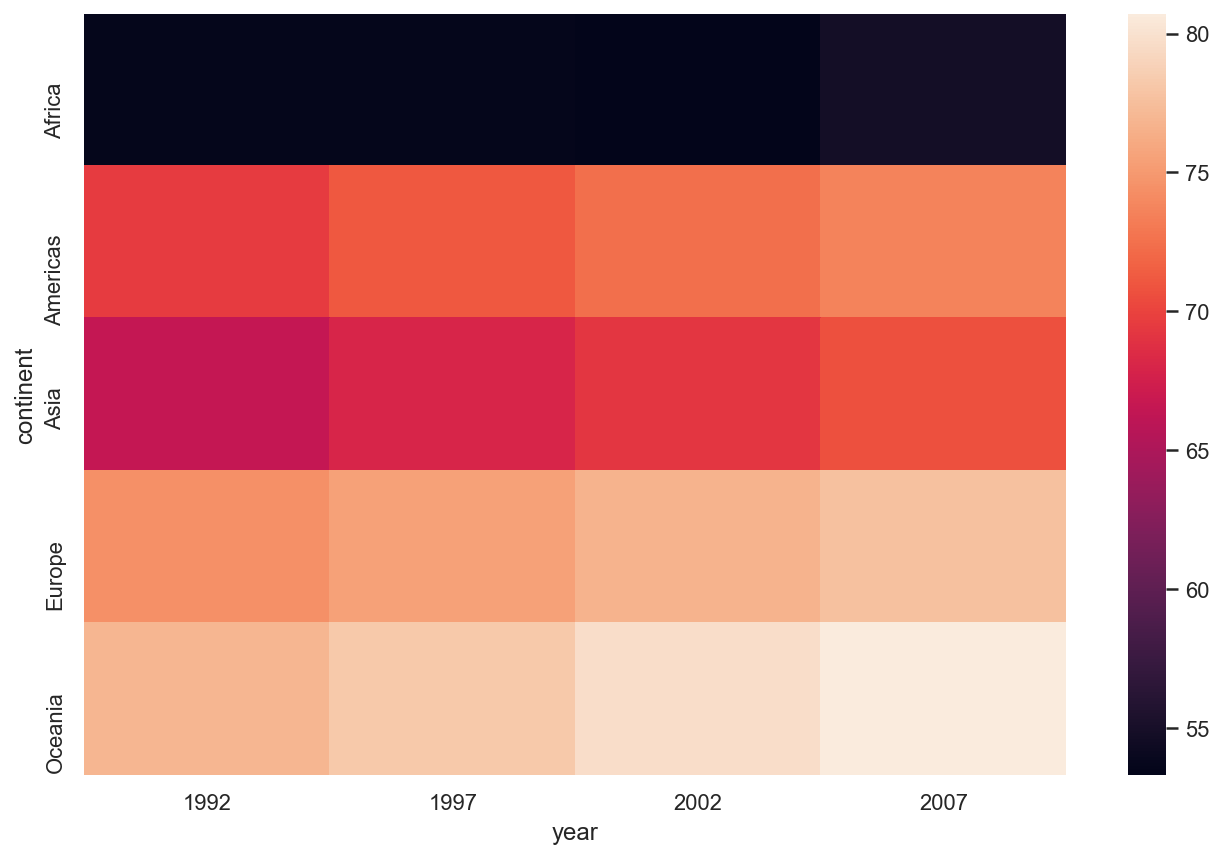

In [43]:
sns.heatmap(gm_df
     .groupby(['continent', 'year'])
     ['lifeExp']
     .mean()
     .unstack('year')
     .loc[:, 1992:2007]
);

### **Challenge**: Experimenting with Grouping on `titanic`

Some of questions involving grouping that one might try to answer about the `titanic` dataset are:

In [44]:
titanic_df = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/ai-cyber-foundry-data-mnpl-expl-workshop/main/data/titanic-kaggle.csv'
)

In [45]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What is total number of passangers by sex?

In [46]:
titanic_df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

What is the number of passangers by port of embarkment?

In [47]:
titanic_df.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

What is the mean age by sex?

In [48]:
titanic_df.groupby('Sex')[['Age']].mean()

,Age
Sex,
female,27.915709
male,30.726645


How many passengers travelled alone, by sex?

What is the mean fare value by class?

How many passengers survived and died, by class?

How many passengers survived and died, by sex?

What are the highest values for `sibsp` (number of siblings/spouses) and `parch` (number of parents/children) by sex?

Compare the average fear paid by men and women, broken down in the three different classes.

## Multivariate Data Distributions, Relationships, and Plots
In terms of data exploration, most of what we have covered so far concerned univariate data distributions. For example, for quantitative features, we have analysed summary statistics, such as median and IQR, and plotted KDEs and histograms to gain insights in their data distribution; also, to learn whether those contained missing or noisy values, and outliers.

We expand now our exploratory data analysis to multivariate distributions. In other words, we will investigate how the data in distributed for two or more features jointly. By and large, at this stage, this will be done visually, with the help of some sophisticated plots offered by seaborn. This will allow us, for example, to identify potential relationships between features to help answer some interesting questions (e.g., is BMI associated with diabetes?, has life expectancy varied predictably according to year?); also, to inform subsequent data science stages such as building machine learning models to predict outcomes based on useful predictors (e.g., use travelling class and sex to predict whether travellers survived).

As a reminder, the topic of data visualisation is going to be given a more formal treatment in the second part of the unit. Right now, we are only interested in quickly plotting some charts to help us with data understanding and exploration.

### Firstly, Some Useful Data Transformations

#### A Reminder of Types of Features

As a refresher: typically, in Data Science, we deal with two main types of features, **quantitative** and **qualitative**, which are normally classified into:

* quantitative:
    - **continuous**: e.g., temperature, BMI, GDP per capita (**numeric**); timestamp of sales transaction (**time**) 
    - **discrete**: number of pregnancies, age (**numeric**); year, month, day of the week, 4h-interval (**time**)
* qualitative:
    - **categorical**:
        + **unordered**: continent, outcome (of diagnosis), travelling class
        + **ordinal**: review (e.g., from `poor` to `outstanding`), temperature (`low`, `medium`, `high`).
        

#### Discretisation

At times, it is useful, for certain data science or machine learning tasks, to encode the data differently. A useful, relevant transformation here is that of **discretisation** - converting a quantitative into a categorical one.

For example, one could think of working with BMI as categorical rather than a continuous data type. Discretisation can be achieved practically, say, via [`pd.cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) function as the example below shows.

The standard definition (e.g., from Wikipedia) of different BMI bands is:

* *Underweight*: < 18.5.
* *Normal weight*: between 18.5 and 25.
* *Overweight*: between 25 to 30.
* *Obese*: 30 or greater.

In [49]:
max_BMI = pima_df['BMI'].max()
pima_df['BMI_cat'] = pd.cut(
    pima_df['BMI'],
    bins=[0, 18.5, 25, 30, max_BMI + 0.001],
    labels=['low', 'normal', 'overweight', 'obese'],
    right=False,
    include_lowest=True
)

In [50]:
pima_df.sample(5, random_state=42)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat
668,6,98,58,33,190,34.0,0.430,43,0,obese
324,2,112,75,32,0,35.7,0.148,21,0,obese
624,2,108,64,0,0,30.8,0.158,21,0,obese
690,8,107,80,0,0,24.6,0.856,34,0,normal
473,7,136,90,0,0,29.9,0.210,50,0,overweight


Notice that `pandas` creates a `category` that is **ordinal** (`[low < normal < overweight < obese]`), and that the parameters `right` and `include_lowest` indicate whether the intervals are open or closed, and at which endpoint.

In [51]:
pima_df['BMI_cat'].head(1)

0    obese
Name: BMI_cat, dtype: category
Categories (4, object): ['low' < 'normal' < 'overweight' < 'obese']

One could also simply map a set of distinct (discrete) values into categorical ones with `.map()`:

In [52]:
pima_df['Outcome'].head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [53]:
pima_df['Outcome'].map({1: 'Diabetic', 0: 'Non-Diabetic'}).astype('category')

0          Diabetic
1      Non-Diabetic
2          Diabetic
3      Non-Diabetic
4          Diabetic
           ...     
763    Non-Diabetic
764    Non-Diabetic
765    Non-Diabetic
766        Diabetic
767    Non-Diabetic
Name: Outcome, Length: 768, dtype: category
Categories (2, object): ['Diabetic', 'Non-Diabetic']

In [54]:
pima_df['Outcome_cat'] = pima_df['Outcome'].map({1: 'Diabetic', 0: 'Non-Diabetic'})

In [55]:
pima_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat,Outcome_cat
0,6,148,72,35,0,33.6,0.627,50,1,obese,Diabetic
1,1,85,66,29,0,26.6,0.351,31,0,overweight,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,1,normal,Diabetic
3,1,89,66,23,94,28.1,0.167,21,0,overweight,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,1,obese,Diabetic


### Plotting Grids (via `plt.subplots()`)

Just to refresh our minds, a KDE/histogram has been quite useful for understanding data distributions of quantitative features.

/Users/55011173/miniconda3/envs/minimalDSenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


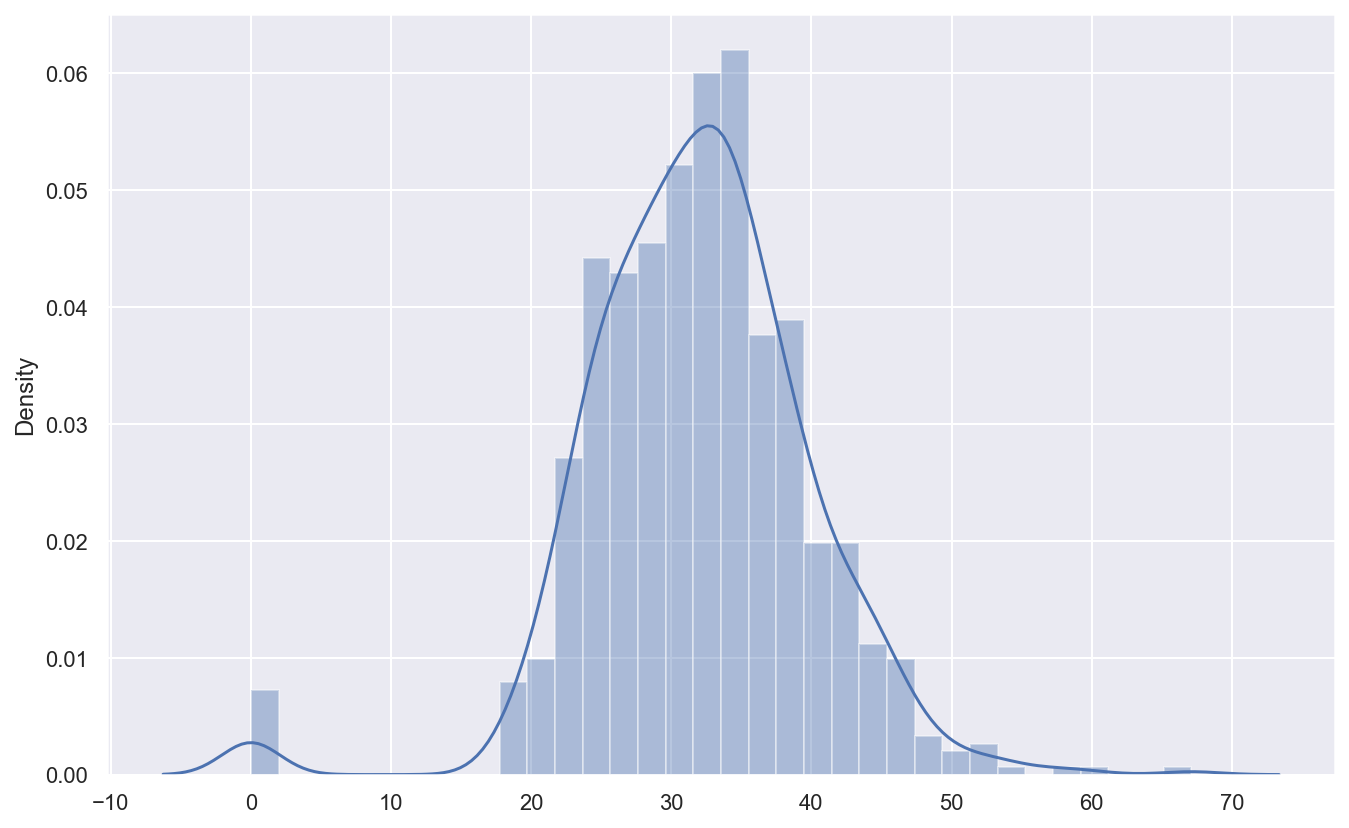

In [57]:
sns.distplot(x=pima_df['BMI']);

A nice addition - one can have multiple plots in a more convenient layout with `matplotlib`'s `.subplots()`. It produces a `Figure` object (assigned to `fig`) and a collection of `Axis` objects (assigned to `axs`). In the example below, it produces a 2x2 grid; to address a specific axis, we need two dimensions (e.g., `axs[1,0]` for second row and first column).

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16,8))
sns.distplot(pima_df['BMI'].loc[ pima_df['BMI']>0 ], ax=axs[0,0])
sns.distplot(pima_df['BloodPressure'].loc[ pima_df['BloodPressure']>0 ], ax=axs[0,1])
sns.distplot(pima_df['SkinThickness'].loc[ pima_df['SkinThickness']>0 ], ax=axs[1,0])
sns.distplot(pima_df['Age'].loc[ pima_df['Age']>0 ], ax=axs[1,1]);

There is plenty of copy-and-pasting above...

Below, I have a more flexible fragment code that relies on a loop and an iterable. Not to worry if you don't fully understand it - but keep it as reference for future work and independent study. It is worth mentioning:

* `.reshape(-1)` will change the two dimensional array of axes into a unidimensional one, which is useful for iteration purposes.

* `iter(axs.reshape(-1))` gives me an object that allows for iterating over each axis, one by one.

* `for col in cols`: iterates over the list of columns labels defined by `cols`. At each iteration, `col` binds to one of the labels. In turn, `next(axs_it)` produces the next axis to be plotted on. In the first iteration, `col` is `BMI`, and `cur_ax` will point to the top-left axis.

In [ ]:
(fig, axs) = plt.subplots(2, 2, figsize=(16,8))
axs_it = iter(axs.reshape(-1))
cols = [ 'BMI', 'BloodPressure', 'SkinThickness', 'Age' ]
for col in cols:
    cur_ax = next(axs_it)
    sns.distplot(pima_df[col].loc[ pima_df[col]>0 ], ax=cur_ax);

### Relationships: Two Quantitative Features

The vastly popular way of analysing the visually relationship of two quantitative features is a **scatter plot**. `seaborn` offers the useful `.jointplot()` which, among other things, can display marginal data distributions too.

In [ ]:
df = pima_df.query('BMI>0 and SkinThickness>0')
sns.jointplot(data=df, x='BMI', y='SkinThickness', height=7);

Just by looking at the scatter plot above, is there anything that we can say about a **relationship between `BMI` and `SkinThickness`**? As the values of BMI change (i.e., increase or decrease), do we see, broadly, an associate change in skin thickness?

We can ask `.jointplot()` to help us by displaying a regression line. The shaded area works like a confidence interval - it shows the regression lines produced for many resamplings of the underlying data.

In [ ]:
sns.jointplot(data=df, x='BMI', y='SkinThickness', kind="reg", height=7);

Too many data points will cause **saturation** - the `alpha` parameter is available for a number of types of plots.

In [ ]:
sns.jointplot(data=df, x='BMI', y='SkinThickness', alpha=0.3, height=7);

Also, one can divide the space into a grid of hexagons - the shade of colour matches the data density.

In [ ]:
sns.jointplot(data=df, x='BMI', y='SkinThickness', kind="hex", height=7);

Anyone familiar with contour plots? You've seen it in maps with landscape features.

In [ ]:
sns.jointplot(data=df, x='BMI', y='SkinThickness', kind="kde", height=7);

### Pairs of Features in a Plot Grid

In [ ]:
cols = [ 'Glucose', 'BMI', 'SkinThickness', 'BloodPressure' ]
mask = (pima_df['Glucose']>0) & (pima_df['BloodPressure']>0) & \
    (pima_df['SkinThickness']>0) & (pima_df['BMI']>0)
df = pima_df.loc[ mask, cols ]
sns.pairplot(df, height=3);

In [ ]:
sns.pairplot(df, height=3, plot_kws=dict(alpha=0.3));

In [ ]:
sns.pairplot(df, height=3, kind="reg");

Please don't worry too much about the following right now, as it will be revisited later, but we can quickly obtain some **objective metrics** that quantify the relationship of pairs of features. Here, the strength of association is between **-1** and **1**; the absolute value tells us about its strength and the sign, its direction. Roughly, ~0.7,0.8 is strong, ~0.4,0.5 is moderate, ~0.2 is weak.

In [ ]:
df.corr()

### Adding a Third, Categorical Feature

Use **colour** (`hue`) as a third dimension:

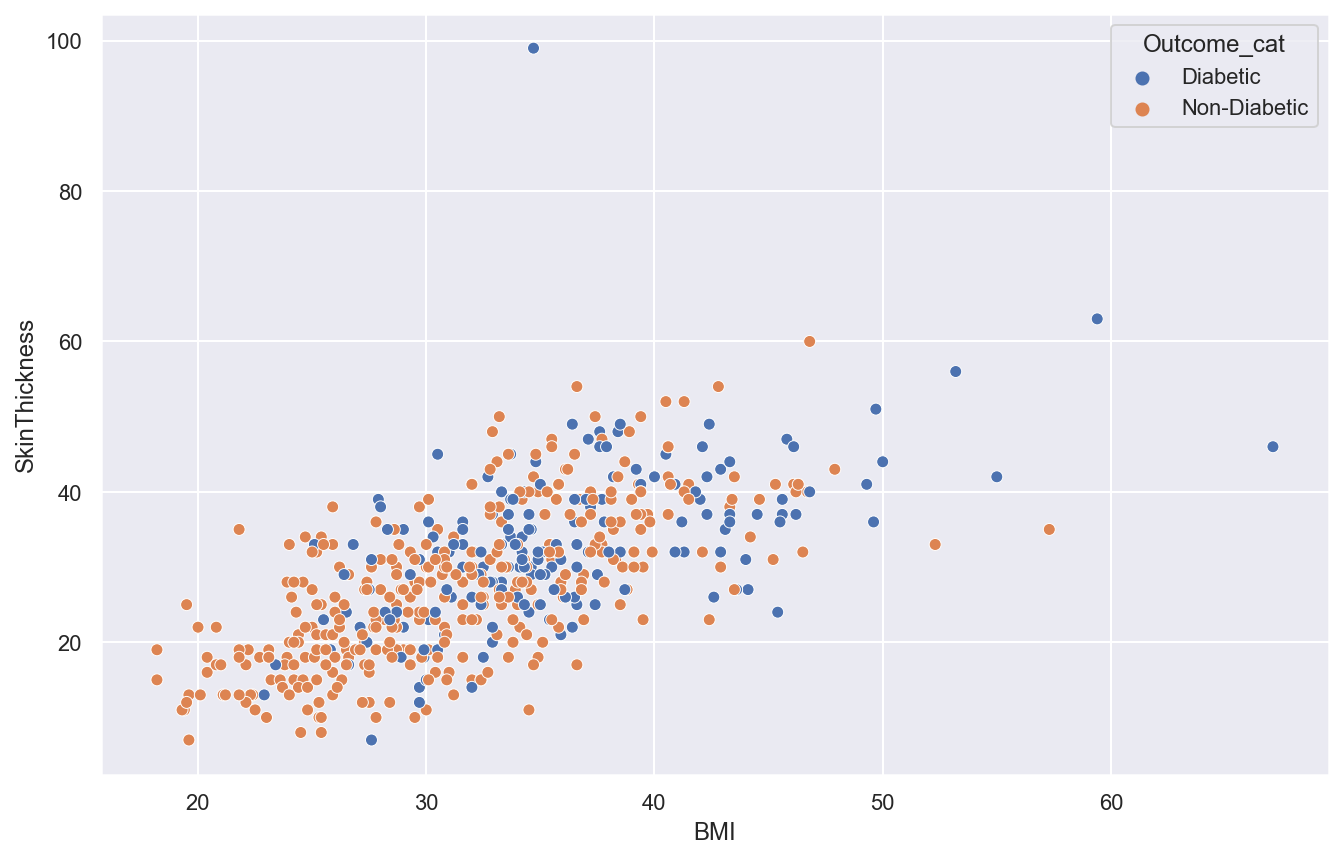

In [59]:
cols = [ 'Glucose', 'BMI', 'SkinThickness', 'BloodPressure', 'Outcome_cat' ]
mask = (pima_df['Glucose']>0) & (pima_df['BloodPressure']>0) & \
    (pima_df['SkinThickness']>0) & (pima_df['BMI']>0)
df = pima_df.loc[ mask, cols ]
sns.scatterplot(data=df, x='BMI', y='SkinThickness', hue='Outcome_cat');

In [ ]:
sns.pairplot(data=df, hue='Outcome_cat', height=3.5);

What do the plots in the diagonal tell us?

### One Categorical, One Quantitative Feature

In [ ]:
plt.figure(figsize=(12/1.5,8/1.5))
sns.boxplot(pima_df.loc[pima_df['Glucose']>0, 'Glucose']);

In [ ]:
sns.boxplot(x='Outcome_cat', y='Glucose', data=pima_df.loc[pima_df['Glucose']>0]);

In [ ]:
plt.figure(figsize=(12/1.2,8/1.2))
sns.boxplot(x='year', y='lifeExp', data=gm_df.loc[ gm_df['continent']=='Europe' ]);

What are those outliers?

In [ ]:
gm_df.loc[ gm_df['continent']=='Europe' ].loc[ gm_df['lifeExp']<50 ]

In [ ]:
sns.violinplot(pima_df['Glucose'], height=8/1.5, aspect=8/5);

In [ ]:
sns.violinplot(x='Outcome_cat', y='Glucose', data=pima_df);

In [ ]:
sns.violinplot(x='year', y='lifeExp', data=gm_df);

In [ ]:
sns.stripplot(x='year', y='lifeExp', data=gm_df, jitter=True);

In [ ]:
cur_ax = sns.boxplot(x='year', y='lifeExp', data=gm_df)
sns.stripplot(x='year', y='lifeExp', data=gm_df, jitter=True, linewidth=0.5, ax=cur_ax);

In [ ]:
sns.stripplot(x='year', y='lifeExp', data=gm_df, hue='continent', jitter=True);

Again - what are those outliers?

In [ ]:
gm_df.query('year==1977 and lifeExp<40')

### Two Categorical Features

In [ ]:
pima_df.groupby(by=['Outcome_cat', 'BMI_cat']).size().unstack()

In [ ]:
pima_df.groupby(by=['Outcome_cat', 'BMI_cat']).size().unstack().plot.bar();

In [ ]:
pima_df.groupby(by=['Outcome_cat', 'BMI_cat']).size().unstack().plot.bar(stacked=True);

In [ ]:
sns.countplot(data=pima_df, x='BMI_cat', hue='Outcome_cat');

In [ ]:
sns.catplot(data=pima_df, x='Outcome_cat', col='BMI_cat', kind="count", col_wrap=2);

In [ ]:
sns.catplot(
    data=pima_df, 
    col='Outcome_cat', 
    y='BMI_cat', 
    kind="count", 
    col_wrap=2,
);

## Checkpoint

Perform a similar exploratory data analysis, using different combinations of quantitative and categorical features, on the `titanic` dataset. For a richer set of features, you might want to use `seaborn`'s build-in version of the data:

In [ ]:
titanic_df = sns.load_dataset('titanic')

In [ ]:
titanic_df.head()